
Epoch 1
Input: [ 0  0 -1], Target: -1, Output: 1, Updated weight: [0.0 0.0 0.2]
Input: [ 0  1 -1], Target: -1, Output: -1, Updated weight: [0.0 0.0 0.2]
Input: [ 1  0 -1], Target: -1, Output: -1, Updated weight: [0.0 0.0 0.2]
Input: [ 1  1 -1], Target: 1, Output: -1, Updated weight: [0.2 0.2 0.0]

Epoch 2
Input: [ 0  0 -1], Target: -1, Output: 1, Updated weight: [0.2 0.2 0.2]
Input: [ 0  1 -1], Target: -1, Output: 1, Updated weight: [0.2 0.0 0.4]
Input: [ 1  0 -1], Target: -1, Output: -1, Updated weight: [0.2 0.0 0.4]
Input: [ 1  1 -1], Target: 1, Output: -1, Updated weight: [0.4 0.2 0.2]

Epoch 3
Input: [ 0  0 -1], Target: -1, Output: -1, Updated weight: [0.4 0.2 0.2]
Input: [ 0  1 -1], Target: -1, Output: 1, Updated weight: [0.4 0.0 0.4]
Input: [ 1  0 -1], Target: -1, Output: 1, Updated weight: [0.2 0.0 0.6]
Input: [ 1  1 -1], Target: 1, Output: -1, Updated weight: [0.4 0.2 0.4]

Epoch 4
Input: [ 0  0 -1], Target: -1, Output: -1, Updated weight: [0.4 0.2 0.4]
Input: [ 0  1 -1], Targ

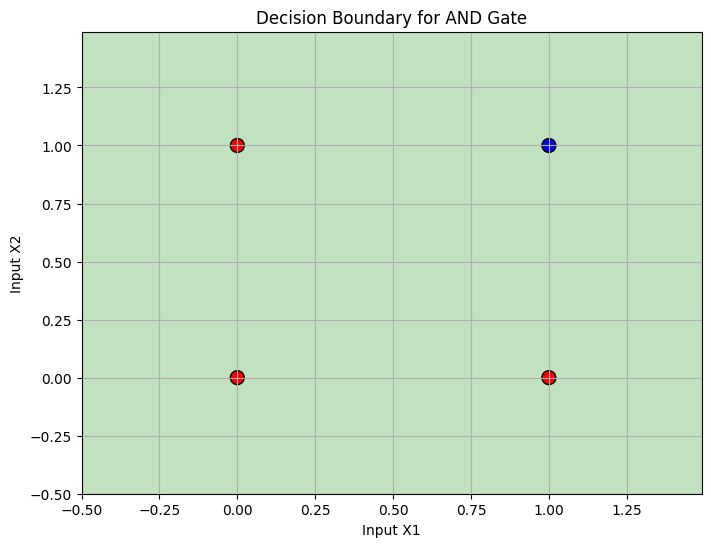

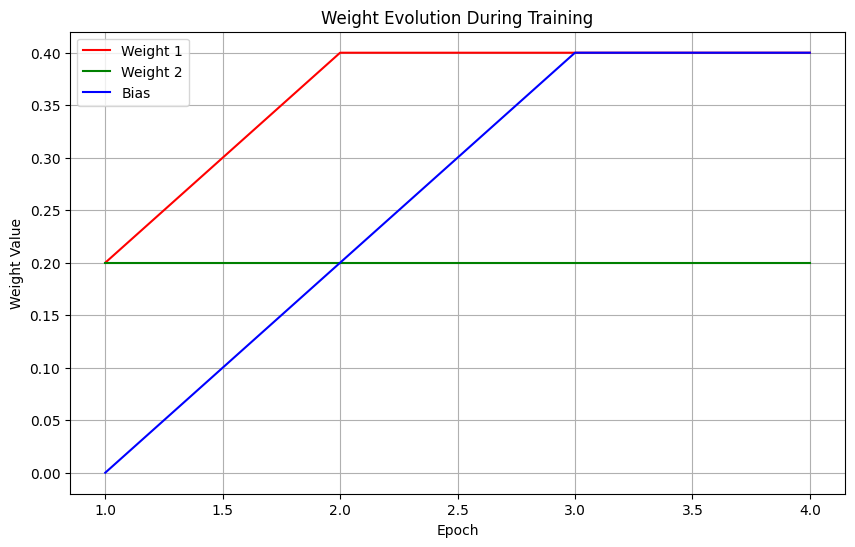

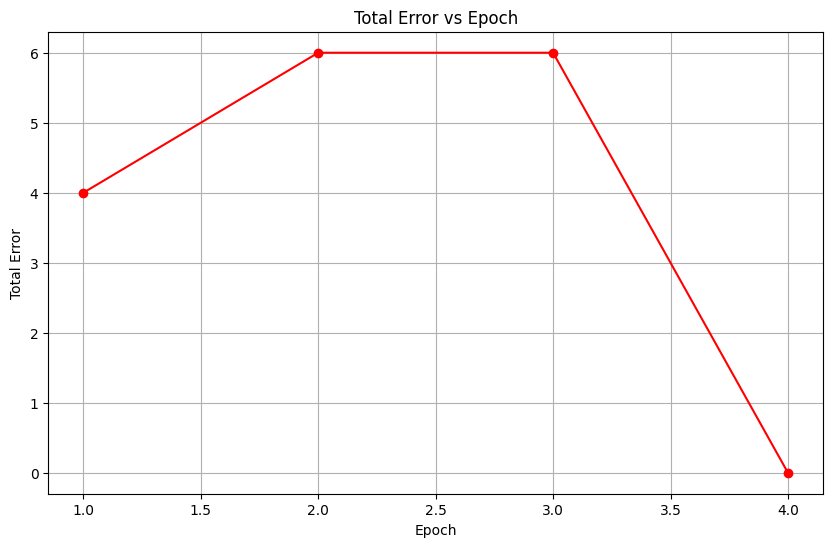

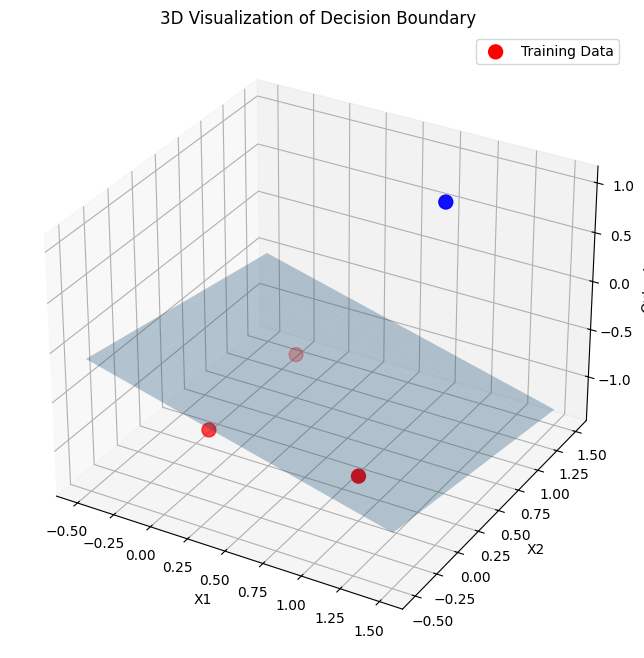

Could not create animation: list index out of range

All visualizations have been generated and saved!


''

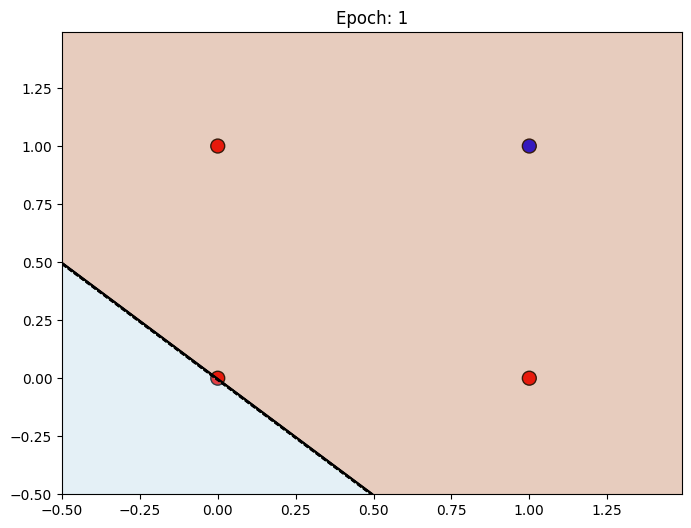

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# input data including bias term -1（偏置 -1）
Data = np.array([
    [0, 0, -1],
    [0, 1, -1],
    [1, 0, -1],
    [1, 1, -1]
])

# Format floats with 1 decimal, and show trailing zeros (0.0) 设置浮点数输出格式
np.set_printoptions(precision=1, floatmode='fixed')

# teacher signal: output of each data input (AND)
Teacher = np.array([-1, -1, -1, 1])

# initial weight: x1, x2, bias, = 0 （初始化权重）
weights = np.zeros(3)

# learning rate
learning_rate = 0.1

# activation: if f(u)>=0 --> 1; f(u)<0 --> -1
def sign(n):
    return 1 if n >= 0 else -1

# epoch counter
epoch = 0

# Arrays to track training history
weight_history = []
error_history = []

# start training loop
while True:
    epoch += 1
    total_error = 0
    print(f"\nEpoch {epoch}")

    # loop over each training sample
    for i in range(len(Data)):
        x = Data[i]         # current input vector
        t = Teacher[i]      # corresponding teacher signal
        # Calculate neuron output, update weight
        net_input = np.dot(weights, x)      # weighted sum
        y = sign(net_input)                 # activation function
        # calculate error = expect output - actual output
        error = t - y
        # weight updating: w = w + learning_rate * error * x
        weights += learning_rate * error * x
        # accumulate total error
        total_error += abs(error)
        # print training details for current sample
        print(f"Input: {x}, Target: {t}, Output: {y}, Updated weight: {weights}")

    # Store the weights and error after this epoch
    weight_history.append(weights.copy())
    error_history.append(total_error)
    
    # if total_error = 0 --> all output is correct, training end
    if total_error == 0:
        break

# print final result
print("\nTraining completed!")
print("Final weights:", weights)

# check output for each input
print("\nNeuron output for each input:")
for i in range(len(Data)):
    output = sign(np.dot(weights, Data[i]))
    print(f"Input: {Data[i]}, Output: {output}")

# Visualization Functions

# 1. Decision Boundary Plot
def plot_decision_boundary():
    plt.figure(figsize=(8, 6))
    
    # Create a meshgrid to plot the decision boundary
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Get predictions for each point in the meshgrid
    Z = np.array([sign(weights[0]*x + weights[1]*y + weights[2]) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, colors='k', linewidths=1)
    
    # Plot the training points
    colors = ['r' if t == -1 else 'b' for t in Teacher]
    plt.scatter(Data[:, 0], Data[:, 1], c=colors, edgecolor='k', s=100)
    
    plt.title('Decision Boundary for AND Gate')
    plt.xlabel('Input X1')
    plt.ylabel('Input X2')
    plt.grid(True)
    plt.savefig('decision_boundary.png')
    plt.show()

# 2. Weight Evolution Plot
def plot_weight_evolution():
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(weight_history) + 1)
    
    plt.plot(epochs, [w[0] for w in weight_history], 'r-', label='Weight 1')
    plt.plot(epochs, [w[1] for w in weight_history], 'g-', label='Weight 2')
    plt.plot(epochs, [w[2] for w in weight_history], 'b-', label='Bias')
    
    plt.title('Weight Evolution During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Weight Value')
    plt.legend()
    plt.grid(True)
    plt.savefig('weight_evolution.png')
    plt.show()

# 3. Error Plot
def plot_error_evolution():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(error_history) + 1), error_history, 'r-o')
    plt.title('Total Error vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.grid(True)
    plt.savefig('error_evolution.png')
    plt.show()

# 4. 3D Visualization of the Separating Plane
def plot_3d_decision_boundary():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the training points
    colors = ['r' if t == -1 else 'b' for t in Teacher]
    ax.scatter(Data[:, 0], Data[:, 1], Teacher, c=colors, s=100, label='Training Data')
    
    # Plot the separating plane
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 10), np.linspace(-0.5, 1.5, 10))
    z = (-weights[0] * xx - weights[1] * yy - weights[2]) / 1.0  # Assuming output weight = 1
    
    ax.plot_surface(xx, yy, z, alpha=0.3)
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Output')
    ax.set_title('3D Visualization of Decision Boundary')
    plt.legend()
    plt.savefig('3d_decision_boundary.png')
    plt.show()

# 5. Animation of Decision Boundary Evolution (optional, more advanced)
def create_decision_boundary_animation():
    try:
        from matplotlib.animation import FuncAnimation
        
        fig, ax = plt.subplots(figsize=(8, 6))
        
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        
        # Plot the training points
        colors = ['r' if t == -1 else 'b' for t in Teacher]
        scatter = ax.scatter(Data[:, 0], Data[:, 1], c=colors, edgecolor='k', s=100)
        
        contourf = None
        contour = None
        title = ax.set_title('Epoch: 0')
        
        def update(frame):
            nonlocal contourf, contour
            
            if contourf:
                for coll in contourf.collections:
                    coll.remove()
            if contour:
                for coll in contour.collections:
                    coll.remove()
            
            # Get predictions for the current weights
            w = weight_history[frame]
            Z = np.array([sign(w[0]*x + w[1]*y + w[2]) for x, y in zip(xx.ravel(), yy.ravel())])
            Z = Z.reshape(xx.shape)
            
            # Plot the decision boundary
            contourf = ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
            contour = ax.contour(xx, yy, Z, colors='k', linewidths=1)
            
            title.set_text(f'Epoch: {frame+1}')
            return contourf, contour
        
        ani = FuncAnimation(fig, update, frames=len(weight_history), interval=500, blit=False)
        
        # Save as GIF (requires imagemagick)
        ani.save('decision_boundary_evolution.gif', writer='pillow', fps=2)
        plt.close()
        print("Animation saved as 'decision_boundary_evolution.gif'")
    except Exception as e:
        print(f"Could not create animation: {e}")

# Generate all plots
print("\nGenerating visualizations...")
plot_decision_boundary()
plot_weight_evolution()
plot_error_evolution()
plot_3d_decision_boundary()
create_decision_boundary_animation()  # Optional - creates an animation if dependencies available

print("\nAll visualizations have been generated and saved!")

input("\nPress ENTER to exit...")